In [1]:
import pandas as pd
import pickle
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from coclust.clustering.spherical_kmeans import SphericalKmeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import euclidean
from matplotlib import pyplot as plt

In [2]:
filepath = 'data/similarity_matrix.pickle'

In [3]:
with open(filepath, 'rb') as lf :
        similarity_vector = pickle.load(lf)

In [4]:
my_k = 30
my_k_hi = 2

Text(0, 0.5, 'Number of documents')

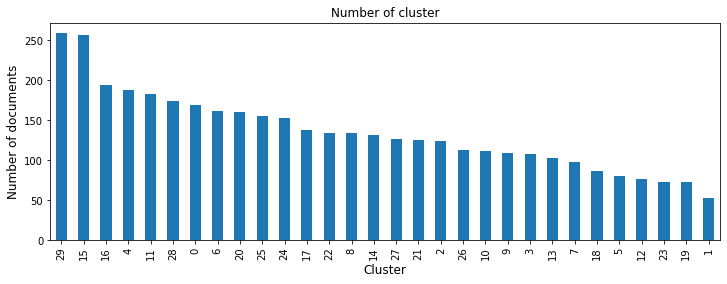

In [5]:
kmeans = KMeans(n_clusters= my_k, random_state=1004).fit(similarity_vector)
clusters = kmeans.labels_

clusters = pd.DataFrame(clusters)
a = clusters[0].value_counts()

ax = a.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Number of documents', fontsize=12)

In [6]:
clusters

,0
0,6
1,15
2,28
3,28
4,28
...,...
4041,28
4042,28
4043,19
4044,28


In [7]:
a = clusters[0].value_counts()

In [8]:
a

29    259
15    256
16    194
4     188
11    183
28    174
0     169
6     162
20    160
25    155
24    153
17    138
22    134
8     134
14    132
27    127
21    125
2     124
26    112
10    111
9     109
3     107
13    103
7      97
18     86
5      80
12     76
23     73
19     72
1      53
Name: 0, dtype: int64

In [9]:
lrg_cluster1 = a.index[0]
lrg_cluster2 = a.index[1]

In [10]:
clusters_large = clusters[clusters[0] == lrg_cluster1]

In [11]:
clusters_large.index

Int64Index([  53,   54,   98,  102,  110,  139,  158,  159,  162,  173,
            ...
            3738, 3806, 3818, 3819, 3904, 3916, 3917, 3947, 3988, 3995],
           dtype='int64', length=259)

In [12]:
lrg_cluster1_df = similarity_vector.loc[clusters_large.index, clusters_large.index]
lrg_cluster1_df

,53,54,98,102,110,139,158,159,162,173,...,3738,3806,3818,3819,3904,3916,3917,3947,3988,3995
53,1.000000,0.946433,0.887317,0.818401,0.873144,0.839538,0.628830,0.893546,0.703612,0.621376,...,0.743582,0.747538,0.853811,0.813759,0.714808,0.620257,0.626174,0.801390,0.768019,0.858744
54,0.946433,1.000000,0.837623,0.774818,0.826930,0.830883,0.578657,0.862111,0.680644,0.587497,...,0.676106,0.715283,0.832492,0.752892,0.771975,0.526337,0.544613,0.765674,0.713300,0.836421
98,0.887317,0.837623,1.000000,0.863314,0.895763,0.753947,0.734251,0.835990,0.836427,0.697810,...,0.791035,0.773292,0.814221,0.842120,0.646747,0.738469,0.765310,0.803158,0.810284,0.823987
102,0.818401,0.774818,0.863314,1.000000,0.841431,0.777475,0.926445,0.839496,0.807941,0.780255,...,0.815895,0.913404,0.846911,0.639044,0.657337,0.739459,0.731591,0.932869,0.905502,0.894671
110,0.873144,0.826930,0.895763,0.841431,1.000000,0.738842,0.717128,0.813229,0.825687,0.682949,...,0.707887,0.682726,0.765281,0.854664,0.655179,0.670358,0.657233,0.719193,0.712521,0.794073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,0.620257,0.526337,0.738469,0.739459,0.670358,0.560936,0.769470,0.676841,0.609601,0.675504,...,0.777408,0.785793,0.628317,0.754873,0.426022,1.000000,0.938077,0.782357,0.779038,0.722638
3917,0.626174,0.544613,0.765310,0.731591,0.657233,0.628280,0.749692,0.658989,0.651471,0.704946,...,0.806834,0.750814,0.622359,0.710808,0.429596,0.938077,1.000000,0.784410,0.788699,0.747209
3947,0.801390,0.765674,0.803158,0.932869,0.719193,0.788924,0.843458,0.861050,0.714846,0.768793,...,0.840016,0.916552,0.848485,0.603454,0.677909,0.782357,0.784410,1.000000,0.921056,0.909985
3988,0.768019,0.713300,0.810284,0.905502,0.712521,0.776841,0.883581,0.704021,0.585094,0.740102,...,0.818343,0.908798,0.704672,0.554972,0.588729,0.779038,0.788699,0.921056,1.000000,0.944818


In [13]:
clusters_large2 = clusters[clusters[0] == lrg_cluster2]

In [14]:
clusters_large2.index

Int64Index([   1,    7,   38,   49,   51,   57,   74,  104,  105,  115,
            ...
            3887, 3910, 3914, 3936, 3940, 3951, 3962, 3966, 3987, 3991],
           dtype='int64', length=256)

In [15]:
lrg_cluster2_df = similarity_vector.loc[clusters_large2.index, clusters_large2.index]
lrg_cluster2_df

,1,7,38,49,51,57,74,104,105,115,...,3887,3910,3914,3936,3940,3951,3962,3966,3987,3991
1,1.000000,0.870366,0.916566,0.904868,0.902489,0.908109,0.719578,0.935202,0.928470,0.897991,...,0.802558,0.887080,0.873283,0.823446,0.861235,0.809090,0.911161,0.912105,0.894440,0.790215
7,0.870366,1.000000,0.928573,0.913719,0.911306,0.919767,0.695038,0.901887,0.932672,0.875336,...,0.828379,0.872418,0.839141,0.750830,0.828237,0.841060,0.884349,0.889566,0.936421,0.808942
38,0.916566,0.928573,1.000000,0.972043,0.968957,0.946168,0.781496,0.926967,0.985753,0.960958,...,0.891614,0.910586,0.903054,0.903829,0.889526,0.856329,0.896173,0.906810,0.937525,0.899127
49,0.904868,0.913719,0.972043,1.000000,0.999320,0.944368,0.739995,0.888827,0.972477,0.918005,...,0.886670,0.893455,0.928997,0.859350,0.876222,0.873141,0.907658,0.927497,0.947008,0.893119
51,0.902489,0.911306,0.968957,0.999320,1.000000,0.941298,0.737727,0.886254,0.969600,0.914634,...,0.882974,0.890412,0.925554,0.855580,0.872902,0.869878,0.905059,0.924777,0.944359,0.889169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951,0.809090,0.841060,0.856329,0.873141,0.869878,0.894053,0.659210,0.803840,0.851820,0.847829,...,0.937401,0.808075,0.862147,0.821825,0.837293,1.000000,0.805805,0.813676,0.825367,0.909068
3962,0.911161,0.884349,0.896173,0.907658,0.905059,0.881898,0.717686,0.840613,0.912183,0.832945,...,0.798667,0.803342,0.932185,0.777524,0.825799,0.805805,1.000000,0.939235,0.879992,0.839033
3966,0.912105,0.889566,0.906810,0.927497,0.924777,0.890515,0.783533,0.862288,0.921954,0.849465,...,0.828879,0.888837,0.928571,0.784368,0.871839,0.813676,0.939235,1.000000,0.902378,0.852553
3987,0.894440,0.936421,0.937525,0.947008,0.944359,0.962710,0.718309,0.865874,0.937832,0.873542,...,0.840063,0.870580,0.874354,0.798748,0.844976,0.825367,0.879992,0.902378,1.000000,0.826409


Text(0, 0.5, 'Number of documents')

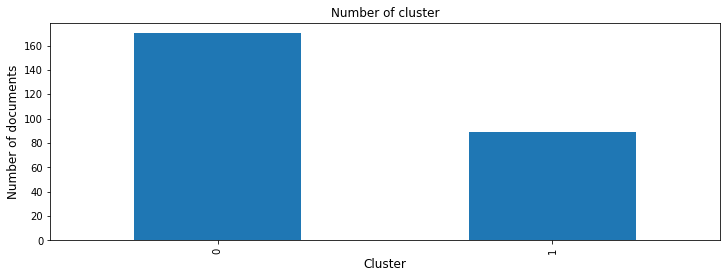

In [16]:
kmeans2 = KMeans(n_clusters= my_k_hi, random_state=1004).fit(lrg_cluster1_df)
clusters2 = kmeans2.labels_

clusters2 = pd.DataFrame(clusters2)
a2 = clusters2[0].value_counts()

ax2 = a2.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax2.set_xlabel('Cluster', fontsize=12)
ax2.set_ylabel('Number of documents', fontsize=12)

In [17]:
clusters2

,0
0,0
1,0
2,0
3,0
4,0
...,...
254,1
255,1
256,0
257,0


In [18]:
clusters2.index = clusters_large.index

Text(0, 0.5, 'Number of documents')

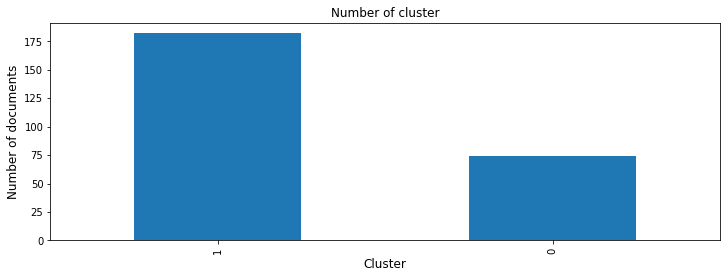

In [19]:
kmeans21 = KMeans(n_clusters= my_k_hi, random_state=1004).fit(lrg_cluster2_df)
clusters21 = kmeans21.labels_

clusters21 = pd.DataFrame(clusters21)
a21 = clusters21[0].value_counts()

ax21 = a21.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax21.set_xlabel('Cluster', fontsize=12)
ax21.set_ylabel('Number of documents', fontsize=12)

In [20]:
clusters21

,0
0,1
1,1
2,1
3,1
4,1
...,...
251,0
252,1
253,1
254,1


In [21]:
clusters21.index = clusters_large2.index

In [22]:
clusters21

,0
1,1
7,1
38,1
49,1
51,1
...,...
3951,0
3962,1
3966,1
3987,1


In [23]:
clusters.columns = ['org_cluster'] # this is the number of original cluster
clusters2.columns = ['lrg1_cluster'] # this is the number of small cluster in the largest cluster
clusters21.columns = ['lrg2_cluster'] # this is the number of small cluster in the 2nd largest cluster

 == New init == 
iteration: 0
2934.687461620767
iteration: 1
3667.4410681862855
iteration: 2
3726.057440371391
iteration: 3
3738.215136093643
iteration: 4
3744.7784919089618
iteration: 5
3749.2517730157197
iteration: 6
3752.184314655158
iteration: 7
3754.2721285207567
iteration: 8
3755.879953365339
iteration: 9
3757.889172298136
iteration: 10
3760.968948954305
iteration: 11
3769.6102856446078
iteration: 12
3777.24889078837
iteration: 13
3779.524487290048
iteration: 14
3780.333827310328
iteration: 15
3780.7412218362642
iteration: 16
3780.8657622921287
iteration: 17
3780.974826333939
iteration: 18
3781.04330097116
iteration: 19
3781.0926740845725


Text(0, 0.5, 'Number of documents')

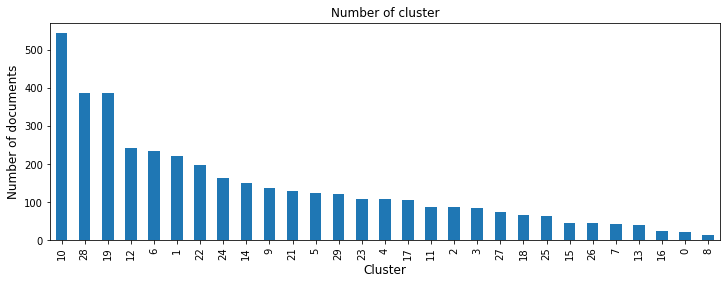

In [24]:
similarity_vector2 = similarity_vector.to_numpy()

kmeans3 = SphericalKmeans(n_clusters= my_k, random_state=1004)
s_kmeans = kmeans3.fit(similarity_vector2)
clusters3 = kmeans3.labels_

clusters3 = pd.DataFrame(clusters3)
a3 = clusters3[0].value_counts()

ax3 = a3.plot(kind='bar', title='Number of cluster', figsize=(12, 4), legend=None)
ax3.set_xlabel('Cluster', fontsize=12)
ax3.set_ylabel('Number of documents', fontsize=12)

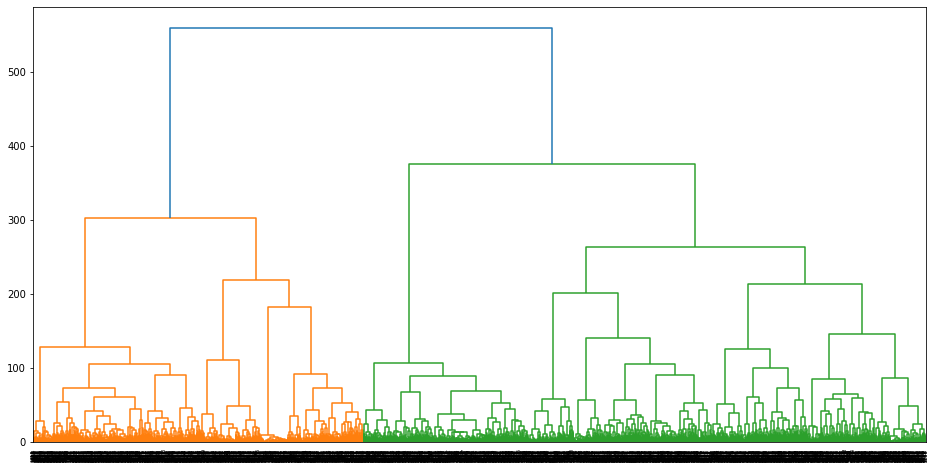

In [25]:
linked = linkage(similarity_vector, method = 'ward')

plt.figure(figsize=(16, 8))
dendrogram(linked)
plt.show()